### Decision Tree
#### iris 분류

In [41]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
!pip install graphviz

In [42]:
iris=load_iris()

In [43]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=0.7,test_size=0.3,
                                              random_state=102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [46]:
cif=tree.DecisionTreeClassifier()
cif_dt=cif.fit(x_train,y_train)

In [47]:
y_pred=cif_dt.predict(x_test)

In [48]:
y_pred

array([0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1,
       2])

In [49]:
cfmat=confusion_matrix(y_test,y_pred)
cfmat

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 14]], dtype=int64)

In [50]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9333333333333333


In [54]:
import graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [55]:
dot_data=tree.export_graphviz(cif_dt,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True)
graph=graphviz.Source(dot_data)

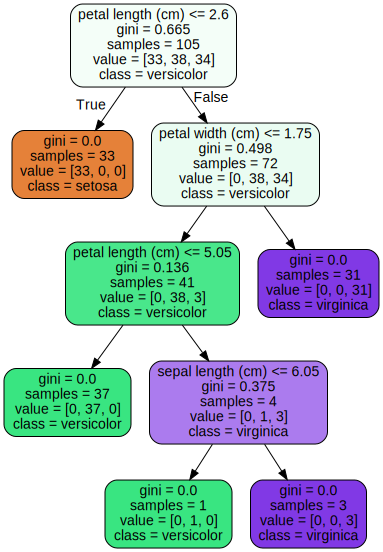

In [56]:
graph

- #### 엔트로피를 활용한 트리

In [62]:
cif2=tree.DecisionTreeClassifier(criterion='entropy')
cif2_dt=cif2.fit(x_train,y_train)
y_pred2=cif2_dt.predict(x_test)

print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333


In [63]:
dot_data2=tree.export_graphviz(cif2_dt,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True)
graph2=graphviz.Source(dot_data2)

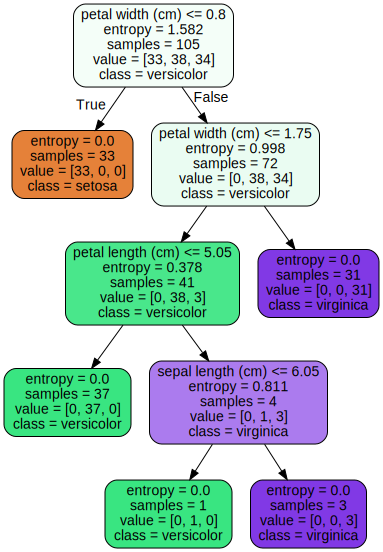

In [64]:
graph2

- #### 프루닝

In [65]:
cif3=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
cif3_dt=cif3.fit(x_train,y_train)
y_pred3=cif3_dt.predict(x_test)

print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333


In [66]:
dot_data3=tree.export_graphviz(cif3_dt,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True)
graph3=graphviz.Source(dot_data3)

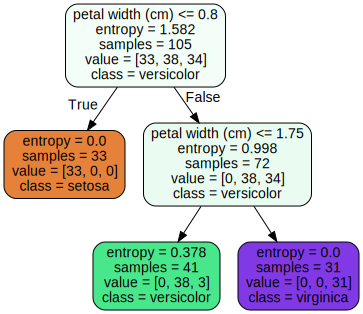

In [67]:
graph3

In [68]:
accuracy_score(iris.target,cif2.predict(iris.data))

0.98

In [69]:
accuracy_score(iris.target,cif.predict(iris.data))

0.98

In [70]:
accuracy_score(iris.target,cif3.predict(iris.data))

0.96